In [68]:
%pip install google-cloud-firestore
%pip install requests
%pip install pandas

google-auth 1.7.0 has requirement setuptools>=40.3.0, but you'll have setuptools 39.2.0 which is incompatible.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
google-auth 1.7.0 has requirement setuptools>=40.3.0, but you'll have setuptools 39.2.0 which is incompatible.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
google-auth 1.7.0 has requirement setuptools>=40.3.0, but you'll have setuptools 39.2.0 which is incompatible.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# Parse data from Firestore

In [38]:
from google.cloud import firestore
from google.oauth2 import service_account
from datetime import datetime
import dateutil.parser
import requests

credentials = service_account.Credentials.from_service_account_file(
    'api-key.json',
    scopes=["https://www.googleapis.com/auth/cloud-platform"],
)

db = firestore.Client(
    credentials=credentials,
    project=credentials.project_id)

installation_ids = [8077, 1096, 10216, 9910, 58, 17, 9924, 2277, 820, 
                          8076, 9901, 9885, 9919, 2935, 9895, 9915, 9905, 8165, 
                          842, 9920, 2339, 1026, 9896, 9576, 9911, 7654, 2185, 
                          9897, 7661, 9888, 60, 9904, 2689, 7848, 10032, 9886, 
                          2743, 9890, 2903, 9899, 7514, 9906, 8973, 9921, 2098, 
                          7956, 9903, 9898, 9907, 7634, 9908, 3282, 9916, 9917, 
                          18, 9914, 9902, 9889, 9887, 7771, 9894, 5651, 2513, 
                          251, 7456, 9952, 237, 5624, 1029, 239, 59, 9892, 7617, 
                          1070, 627, 8979, 9912, 605, 6885, 9891, 8086, 247, 245, 
                          238, 7758, 9077, 7844, 233, 9913, 5625, 9923, 6070, 549, 
                          493, 6147, 241, 19, 5709, 7683, 708, 662, 7592, 9918, 347, 
                          7915, 9909, 6068, 6646, 6387, 7554, 329, 8017, 512, 246, 
                          236, 491, 7068, 8152, 7467, 7768, 1033, 10051, 7584, 7917, 
                          541, 7385, 397, 2274, 642, 5649, 301, 353, 5759, 423, 354, 
                          1092, 2123, 9996, 2467, 7656, 7427, 811, 335, 9922, 482, 
                          2440, 8983, 7673, 7386, 6076, 7685, 7383, 6643, 2849, 8981, 
                          7055, 883, 244, 931, 320, 492, 64, 323, 304, 521, 6381, 2832, 
                          9008, 327, 248, 366, 503, 7012, 7850, 349, 8126, 2827, 7872, 
                          615, 8082, 2066, 207, 620, 326, 413, 274, 2707, 2436, 473, 
                          5763, 6887, 7053, 7920, 2545, 2599, 3372, 332, 6116, 7566, 
                          7912, 350, 318, 7384, 514, 2869, 2655, 527, 3071, 6628, 2739, 
                          9946, 9106, 290, 7057, 5761, 2158, 2662, 291, 6095, 2554, 6649, 
                          7458, 6891, 6072, 2651, 8816, 6456, 317, 2975, 784, 7051, 7413, 
                          429, 2383, 810, 877, 8124, 7460, 5707, 388, 7049, 2419, 8157, 677, 
                          516, 7070, 8154, 2581, 314, 7687, 2090, 2872, 2454, 6093, 6893, 
                          296, 312, 7580, 313, 7983, 2619]


In [8]:
import pickle

def serialize(obj, name):
    with open(name, "wb") as file:
        pickle.dump(obj, file)
        file.flush()
        
def deserialize(name):
    with open(name, "rb") as file:
        return pickle.load(file)

In [62]:
import time

def get_location(inst_id):
    response_raw = requests.get('https://airapi.airly.eu/v2/installations/{}'.format(inst_id), 
                 headers={'Accept': 'application/json', 
                          'apikey': 'apikey'})
    if(response_raw.status_code is not 200):
        print(response_raw.json(), response_raw.status_code)
        return
    
    response = response_raw.json()
    
    if response is not None:
        latitude = response['location']['latitude'] if 'location' in response else None
        longitude = response['location']['longitude'] if 'location' in response else None
        elevation = response['elevation'] if 'elevation' in response else None
        city = response['address']['city'] if 'address' in response else None
        is_krakow = "Kraków" in city if city is not None else None
        return {
            'latitude': latitude,
            'longitude': longitude,
            'city': city,
            'elevation': elevation,
            'is_krakow': is_krakow
        }
    else:
        None

def parse_locations(ids = None):
    locations = {}
    for inst_id in installation_ids:
        locations[inst_id] = get_location(inst_id)
        time.sleep(.300)
    return locations

locations = parse_locations()

{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message':

{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429
{'message': 'API rate limit exceeded'} 429


In [64]:
def parse_installations_remote(ids = None):
    installations = list(db.collection('installations').list_documents())
    installations_flat = {}

    for installation in installations:
        inst_id = int(installation.id.replace("_", ""))
        if ids is None or inst_id in ids:
            measurements = installation.collection('measurements').stream()
            measurements_flat = {}
            for measurement in measurements:
                for record in measurement.to_dict()['history']:
                    date = dateutil.parser.parse(record['fromDateTime'])
                    measurements_flat[date] = record
            installations_flat[inst_id] = {
                'measurements': measurements_flat,
                'location': locations[inst_id] if inst_id in locations else None
            }
    serialize(installations_flat, "installations.dat")
    return installations_flat

def parse_installations_local(ids = None):
    installations = deserialize("installations.dat")
    if ids is None:
        return installations
    return { key: installations[key] for key in ids }

def parse_installations(ids = None, local = True):
    if local:
        return parse_installations_local(ids)
    else:
        return parse_installations_remote(ids)

installations = parse_installations(None, False)

# Plot single installation metrics in given range

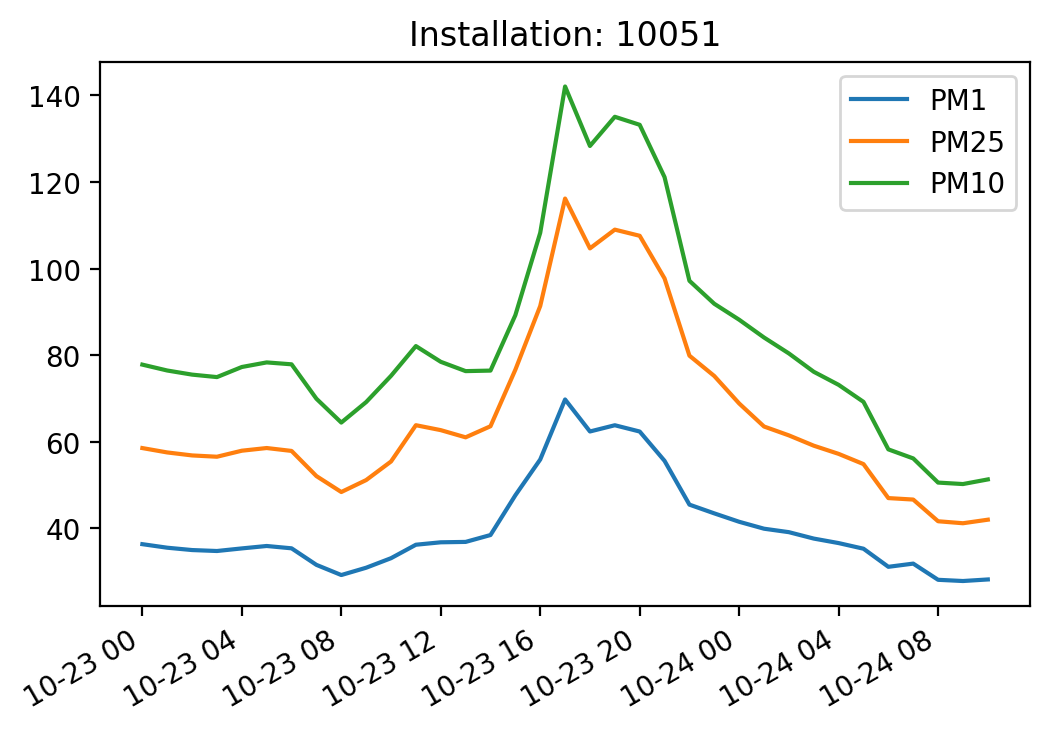

In [65]:
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib import dates as dat
from datetime import datetime, timezone
import numpy as np

plt.rcParams['figure.dpi'] = 200

def plot_metrics_for_installation(installations, installation_id, metrics, start=None, end=None):
    datetimes = []
    values = {}
    for (key, value) in sorted(installations[installation_id]['measurements'].items(), key=lambda k: k[0]):
        if set(metrics).issubset(set(map(lambda val: val['name'], value['values']))):
            if (start is None or start <= key) and (end is None or end >= key):
                datetimes.append(key)
                for v in value['values']:
                    if v['name'] in metrics:
                        val_list = values.get(v['name'], [])
                        val_list.append(v['value']) 
                        values[v['name']] = val_list

    for (key, serie) in values.items():
        plt.plot(datetimes, serie, label=key)

    plt.gcf().autofmt_xdate()
    plt.legend()
    plt.title('Installation: {}'.format(installation_id))
    plt.show()

start_date = datetime(2019, 10, 23, 0, 0, 0, tzinfo=timezone.utc)
end_date = datetime(2019, 10, 24, 10, 0, 0, tzinfo=timezone.utc)
plot_metrics_for_installation(installations, 10051, ['PM1', 'PM10', 'PM25'], start_date, end_date)

# Plot averaged metrics

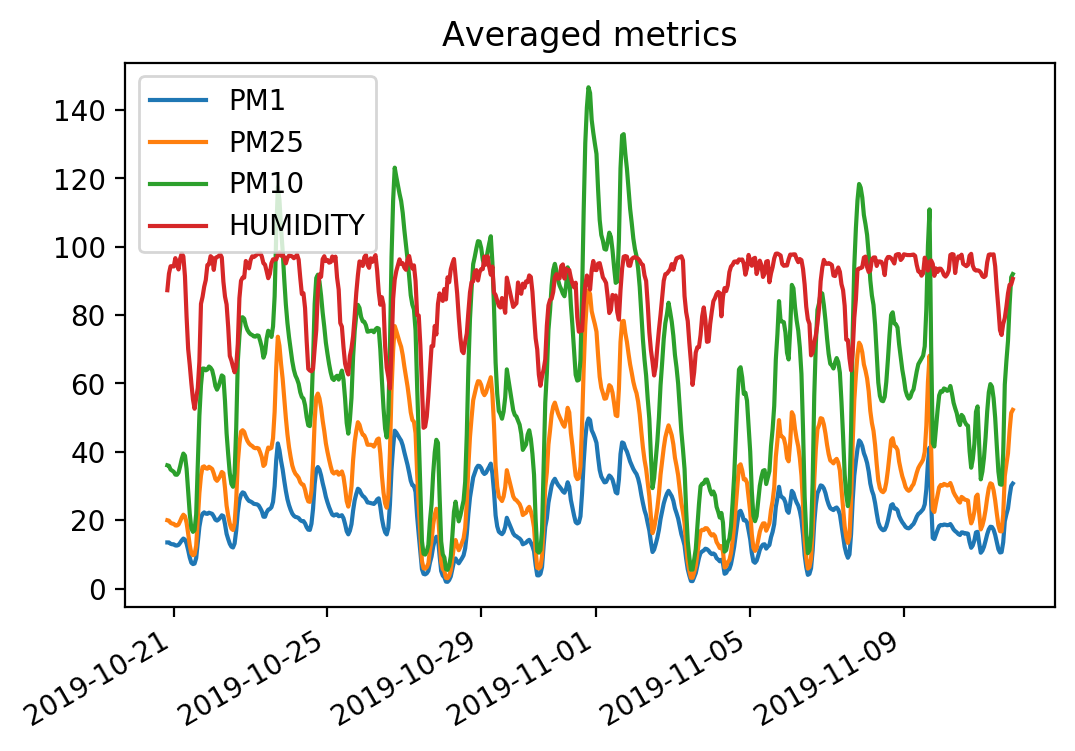

In [66]:
from functools import reduce

plt.rcParams['figure.dpi'] = 200

def plot_averaged_metrics(installations, metrics, start=None, end=None):
    values = {}
    for inst in installations.values():
        for (key, value) in sorted(inst['measurements'].items(), key=lambda k: k[0]):
            if set(metrics).issubset(set(map(lambda val: val['name'], value['values']))):
                if (start is None or start <= key) and (end is None or end >= key):
                    datetime_values = values.get(key, {})
                    for v in value['values']:
                        if v['name'] in metrics:
                            val_list = datetime_values.get(v['name'], [])
                            val_list.append(v['value']) 
                            datetime_values[v['name']] = val_list
                    values[key] = datetime_values

    series = {}
    datetimes = []
    for (time, metr) in values.items():
        datetimes.append(time)
        for (met_key, met_values) in metr.items():
            met_list = series.get(met_key, [])
            met_list.append(reduce(lambda a,b: a+b, met_values) / len(met_values))
            series[met_key] = met_list
    
    for (key, serie) in series.items():
        plt.plot(datetimes, serie, label=key)

    plt.gcf().autofmt_xdate()
    plt.legend()
    plt.title('Averaged metrics')
    plt.show()
    
plot_averaged_metrics(installations, ['PM1', 'PM10', 'PM25', 'HUMIDITY'])
    

# Correlation matrix

In [111]:
import pandas as pd

flattened_measurements = []
for (inst_id, inst) in installations.items():
    for (date, values) in inst['measurements'].items():
        pm1 = None
        pm25 = None
        pm10 = None
        pressure = None
        humidity = None
        temperature = None
        for v in values['values']:
            if(v['name'] == 'PM1'):
                pm1 = v['value']
            if(v['name'] == 'PM25'):
                pm25 = v['value']
            if(v['name'] == 'PM10'):
                pm10 = v['value']
            if(v['name'] == 'TEMPERATURE'):
                temperature = v['value']
            if(v['name'] == 'HUMIDITY'):
                humidity = v['value']
            if(v['name'] == 'PRESSURE'):
                pressure = v['value']
        
        flattened_measurements.append({
            'month': date.month,
            'day': date.day,
            'weekday': date.weekday(),
            'hour': date.hour,
            'caqi': values['indexes'][0]['value'],
            'pm1': pm1,
            'pm25': pm25,
            'pm10': pm10,
            'temperature': temperature,
            'humidity': humidity,
            'pressure': pressure
        })
    

df = pd.DataFrame(flattened_measurements)

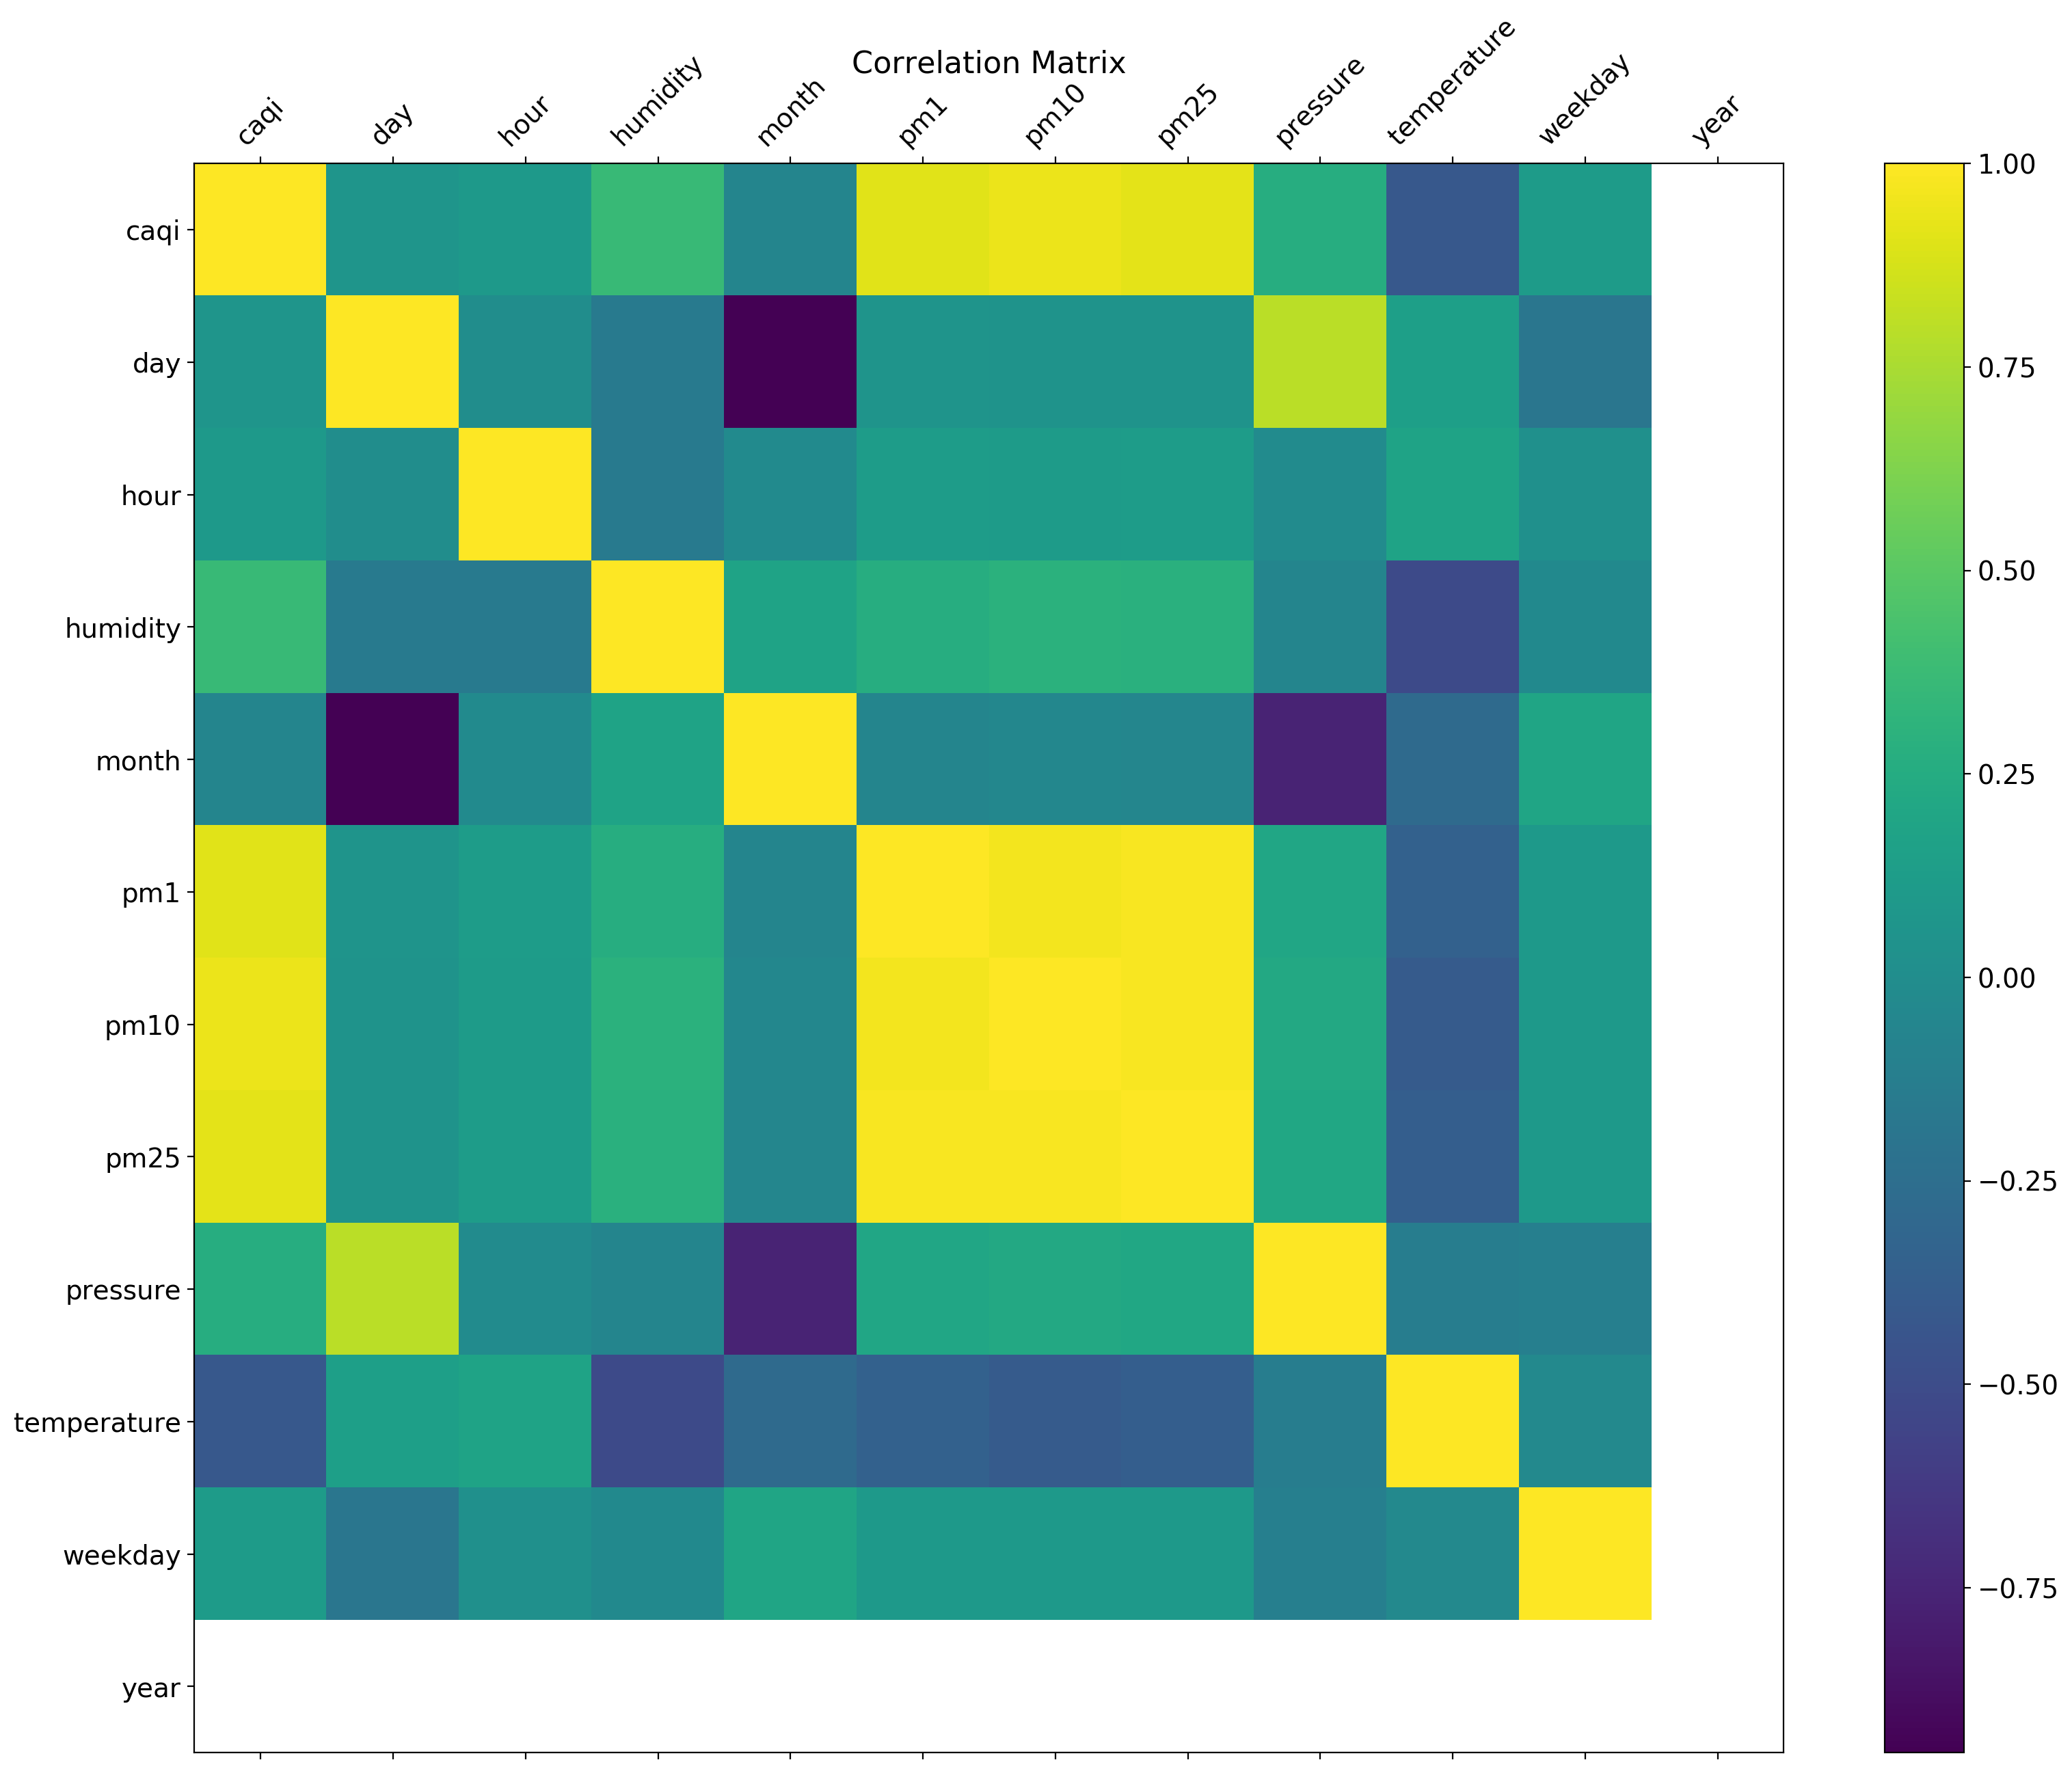

In [113]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);